## Key points

1. NumPy array operations are **much** faster than loops over NumPy arrays
1. Use `numba` to do array operations faster

In [3]:
from skimage import data, io
import numba
from numba import jit, double
%matplotlib inline

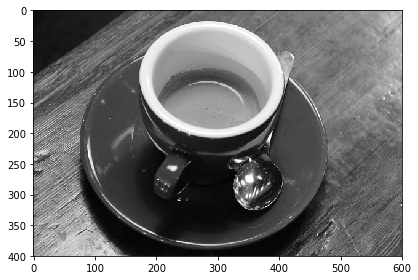

In [4]:
img = data.load('coffee.png', as_grey=True)
io.imshow(img)

In [22]:
def blur_1(data, nblurs):
    blurred_data_1 = data.copy()
    blurred_data_2 = data.copy()
    ny, nx = data.shape
    for step in range(nblurs):  
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                blurred_data_1[i, j] = (blurred_data_2[i, j-1] + blurred_data_2[i, j+1] + 
                                        blurred_data_2[i-1, j] + blurred_data_2[i+1, j])/4.0
        blurred_data_2, blurred_data_1 = blurred_data_1, blurred_data_2
    return blurred_data_2

In [23]:
n = 50
blurred_img = blur_1(img, n)

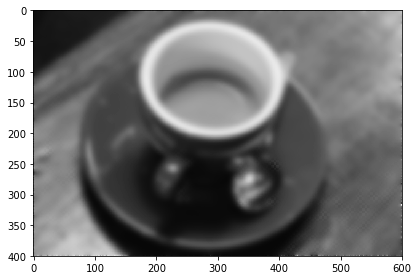

In [24]:
io.imshow(blurred_img)

In [25]:
print(blurred_img)

[[ 0.05623333  0.05651608  0.04978902 ...,  0.73961804  0.75166549
   0.74579451]
 [ 0.05595059  0.05595552  0.05462148 ...,  0.7391306   0.74444824
   0.74297412]
 [ 0.05875608  0.0567148   0.0561199  ...,  0.73784188  0.74398268
   0.74886784]
 ..., 
 [ 0.52715216  0.54759454  0.56145708 ...,  0.33019318  0.32368133
   0.31533412]
 [ 0.61655255  0.57822582  0.57401882 ...,  0.33245527  0.31893272
   0.31195529]
 [ 0.58801529  0.57484392  0.5757     ...,  0.34721176  0.30803373
   0.29569569]]


In [10]:
%%timeit
n = 50
blurred_img = blur_1(img, n)

14 s ± 368 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
def blur_2(data, nblurs):
    blurred_data = data.copy()
    for i in range(nblurs):        
        blurred_data[1:-1, 1:-1] = (blurred_data[0:-2, 1:-1] + blurred_data[2:, 1:-1] +
                                    blurred_data[1:-1, 0:-2] + blurred_data[1:-1, 2:])/4.0
    return blurred_data

In [27]:
n = 50
blurred_img = blur_2(img, n)

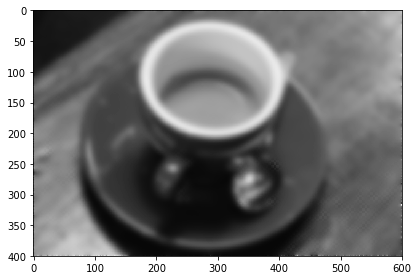

In [28]:
io.imshow(blurred_img)

In [29]:
print(blurred_img)

[[ 0.05623333  0.05651608  0.04978902 ...,  0.73961804  0.75166549
   0.74579451]
 [ 0.05595059  0.05595552  0.05462148 ...,  0.7391306   0.74444824
   0.74297412]
 [ 0.05875608  0.0567148   0.0561199  ...,  0.73784188  0.74398268
   0.74886784]
 ..., 
 [ 0.52715216  0.54759454  0.56145708 ...,  0.33019318  0.32368133
   0.31533412]
 [ 0.61655255  0.57822582  0.57401882 ...,  0.33245527  0.31893272
   0.31195529]
 [ 0.58801529  0.57484392  0.5757     ...,  0.34721176  0.30803373
   0.29569569]]


In [31]:
%%timeit
blurred_img = blur_2(img, n)

88.9 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
@jit(double[:, :](double[:, :], double[:, :]))
def blur_3(data, nblurs):
    blurred_data_1 = data.copy()
    blurred_data_2 = data.copy()
    ny, nx = data.shape
    for step in range(nblurs):  
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                blurred_data_1[i, j] = (blurred_data_2[i, j-1] + blurred_data_2[i, j+1] + 
                                        blurred_data_2[i-1, j] + blurred_data_2[i+1, j])/4.0
        blurred_data_2, blurred_data_1 = blurred_data_1, blurred_data_2
    return blurred_data_2

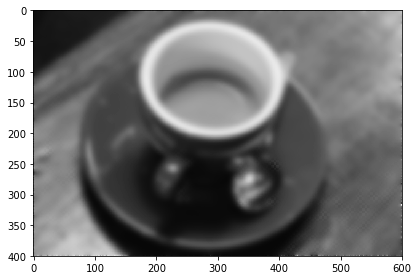

In [33]:
n = 50
blurred_img = blur(img, n)
io.imshow(blurred_img)

In [34]:
print(blurred_img)

[[ 0.05623333  0.05651608  0.04978902 ...,  0.73961804  0.75166549
   0.74579451]
 [ 0.05595059  0.05595552  0.05462148 ...,  0.7391306   0.74444824
   0.74297412]
 [ 0.05875608  0.0567148   0.0561199  ...,  0.73784188  0.74398268
   0.74886784]
 ..., 
 [ 0.52715216  0.54759454  0.56145708 ...,  0.33019318  0.32368133
   0.31533412]
 [ 0.61655255  0.57822582  0.57401882 ...,  0.33245527  0.31893272
   0.31195529]
 [ 0.58801529  0.57484392  0.5757     ...,  0.34721176  0.30803373
   0.29569569]]


In [37]:
%%timeit
blurred_img = blur_3(img, n)

10.8 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
